In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
##Pytorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision import transforms
from torchvision.datasets import ImageFolder

## General modules
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import chain


## Performace metrics
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import normalized_root_mse as nmse

In [3]:
# class CCNConvBlock(nn.Module):
#     def __init__(self, in_channels, out_channels):
#         super(CCNConvBlock, self).__init__()
#         self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=(3,3), stride=1, padding=1)
#         self.batch_norm = nn.BatchNorm2d(out_channels)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.conv(x)
#         x = self.batch_norm(x)
#         x = self.relu(x)
#         return x

# class DENConvBlock(nn.Module):
#     def __init__(self, in_channels, out_channels):
#         super(DENConvBlock, self).__init__()
#         self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=(3,3), stride=1, padding=1)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.conv(x)
#         x = self.relu(x)
#         return x

# class CCN(nn.Module):
#     def __init__(self,input_channels,output_channels):
#         super(CCN, self).__init__()
#         self.Block1 = CCNConvBlock(input_channels,64)
#         self.Block2 = CCNConvBlock(64,64)
#         self.Block3 = CCNConvBlock(64,64)
#         self.Block4 = CCNConvBlock(64,64)
#         self.Block5 = CCNConvBlock(64,64)
#         self.Block6 = CCNConvBlock(128,64)
#         self.Block7 = CCNConvBlock(128,64)
#         self.Block8 = CCNConvBlock(128,64)
#         self.Block9 = CCNConvBlock(128,64)
#         self.Block10 = CCNConvBlock(64,64)
#         self.Out_Layer = nn.Conv2d(64,output_channels,kernel_size=(3,3),stride=1,padding=1)


#     def forward(self,x):
#         Encoder_Output = []
#         x = self.Block1.forward(x)
#         Encoder_Output.append(x)
#         x = self.Block2.forward(x)
#         Encoder_Output.append(x)
#         x = self.Block3.forward(x)
#         Encoder_Output.append(x)
#         x = self.Block4.forward(x)
#         Encoder_Output.append(x)
#         x = self.Block5.forward(x)
#         x = torch.cat((x,Encoder_Output.pop()),dim=1)
#         x = self.Block6.forward(x)
#         x = torch.cat((x,Encoder_Output.pop()),dim=1)
#         x = self.Block7.forward(x)
#         x =torch.cat((x,Encoder_Output.pop()),dim=1)
#         x = self.Block8.forward(x)
#         x = torch.cat((x,Encoder_Output.pop()),dim=1)
#         x = self.Block9.forward(x)
#         x = self.Block10.forward(x)
#         out = self.Out_Layer.forward(x)
#         return out


# class DEN(nn.Module):
#     def __init__(self,input_channels,device):
#         super(DEN, self).__init__()
#         self.Block1 = DENConvBlock(input_channels,64)
#         self.Block2 = DENConvBlock(64,64)
#         self.Block3 = DENConvBlock(64,64)
#         self.Block4 = DENConvBlock(64,64)
#         self.Out_Layer = nn.Conv2d(64,3,kernel_size=(3,3),stride=1,padding=1)
#         self.mean_filter = (torch.ones(3,1,3, 3) / 9.0).to(device)

#     def fm(self,image_a):

#         self.mean_filter = (torch.ones(3,1,3, 3) / 9.0).to(self.device)  # Dividing by 9 for normalization
#         output_image  = F.conv2d(image_a, self.mean_filter,groups=3, padding=1)

#         return output_image

#     def forward(self,x):

#           # Dividing by 9 for normalization

#         I_det_fm  = F.conv2d(x, self.mean_filter,groups=3,padding=1)
#         I_det = x  -I_det_fm
#         I_det = self.Block1(I_det)
#         I_det = self.Block2(I_det)
#         I_det = self.Block3(I_det)
#         I_det = self.Block4(I_det)
#         I_det = self.Out_Layer(I_det)
#         return I_det+x

# class Multi_Scale_Feature_Channel_Shuffle(nn.Module):
#     def __init__(self,in_channels):
#         super(Multi_Scale_Feature_Channel_Shuffle, self).__init__()

#        # 1x1 conv branch
#         self.branch1x1 = nn.Sequential(
#             nn.Conv2d(in_channels, 4, kernel_size=(1,1)),
#             nn.BatchNorm2d(4),
#             nn.ReLU()
#         )

#         # 1x1 conv -> 3x3 conv branch
#         self.branch3x3 = nn.Sequential(
#             nn.Conv2d(in_channels,4 , kernel_size=(3,3),padding=1),
#             nn.BatchNorm2d(4),
#             nn.ReLU()

#         )

#         # 1x1 conv -> 5x5 conv branch
#         self.branch5x5 = nn.Sequential(
#             nn.Conv2d(in_channels,32 , kernel_size=(3,3),padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.Conv2d(32,4 , kernel_size=(3,3),padding=1),
#             nn.BatchNorm2d(4),
#             nn.ReLU()
#         )

#         self.branch7x7 = nn.Sequential(
#             nn.Conv2d(in_channels,32 , kernel_size=(3,3),padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.Conv2d(32,32 , kernel_size=(3,3),padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.Conv2d(32,4 , kernel_size=(3,3),padding=1),
#             nn.BatchNorm2d(4),
#             nn.ReLU()
#         )

#     def ChannelShuffle(self,x):
#         _, _, _, num_channels = x.size()

#         # Generate a random permutation of channel indices
#         permutation = torch.randperm(num_channels, device=x.device)

#         # Shuffle the channels using the permutation
#         shuffled_x = x.permute(0, 1, 2, 3)[..., permutation]

#         return shuffled_x

#     def forward(self, x):
#         branch1x1 = self.branch1x1(x)
#         branch3x3 = self.branch3x3(x)
#         branch5x5 = self.branch5x5(x)
#         branch7x7 = self.branch7x7(x)

#         x  = torch.cat([branch1x1,branch3x3,branch5x5,branch7x7],dim=1)
#         x = self.ChannelShuffle(x)

#         return x

# class MFN(nn.Module):
#     def __init__(self,in_channels,out_channels):
#         super(MFN, self).__init__()
#         self.Block1 = Multi_Scale_Feature_Channel_Shuffle(in_channels)
#         self.Block2 = Multi_Scale_Feature_Channel_Shuffle(16)
#         self.Block3 = Multi_Scale_Feature_Channel_Shuffle(16)
#         self.Block4 = Multi_Scale_Feature_Channel_Shuffle(16)
#         self.Block5 = Multi_Scale_Feature_Channel_Shuffle(16)
#         self.Block6 = Multi_Scale_Feature_Channel_Shuffle(16)
#         self.Block7 = Multi_Scale_Feature_Channel_Shuffle(16)
#         self.Block8 = Multi_Scale_Feature_Channel_Shuffle(16)

#         self.Output_Layer = nn.Conv2d(16,out_channels,kernel_size=(3,3),stride=1,padding=1)

#     def forward(self,x):
#         x = self.Block1(x)
#         x = self.Block2(x)
#         x = self.Block3(x)
#         x = self.Block4(x)
#         x = self.Block5(x)
#         x = self.Block6(x)
#         x = self.Block7(x)
#         x = self.Block8(x)

#         x = self.Output_Layer(x)
#         return x


In [4]:
# class CCNLoss(nn.Module):
#     def __init__(self, weight_r,weight_c,weight_cr):
#         super(CCNLoss, self).__init__()
#         self.weight_r = weight_r
#         self.weight_c = weight_c
#         self.weight_cr = weight_cr
#     def angle_difference(self,pixel_a,pixel_b):
#         normalized_vector_A = F.normalize(pixel_a, p=2, dim=0)
#         normalized_vector_B = F.normalize(pixel_b, p=2, dim=0)

#         # Calculate cosine similarity
#         cosine_similarity = torch.sum(normalized_vector_A * normalized_vector_B)

#         # Clamp the values to avoid numerical instability in arccos
#         cosine_similarity = torch.clamp(cosine_similarity, -1.0 + 1e-7, 1.0 - 1e-7)

#         # Calculate the angle difference (arccos)
#         angle_difference = torch.acos(cosine_similarity)

#         return angle_difference
#     def color_loss(self,image_a,image_b):
#         c_loss=0
#         for i in range(image_a.shape[2]):
#             for j in range(image_a.shape[3]):
#                 pixel_a = image_a[:,:,i,j]
#                 pixel_b = image_b[:,:,i,j]
#                 angle_diff = self.angle_difference(pixel_a,pixel_b)
#                 if(i==0 and j==0):
#                     c_loss = angle_diff
#                 else:
#                     c_loss +=angle_diff
#         return c_loss
#     def channel_relevance_map(self,image_a):
#         P = image_a[0,:,:].unsqueeze(0)
#         Q = image_a[1,:,:].unsqueeze(0)
#         P = P.view(-1,P.shape[1],P.shape[2])
#         Q = Q.view(-1,P.shape[1],P.shape[2])
#         flatten = P.shape[1]*P.shape[2]
#         P = P.view(-1,flatten)
#         Q = Q.view(-1,flatten)

#         Q = torch.transpose(Q,0,1)

#         X = torch.matmul(Q,P)
#         X = F.softmax(X,dim=0)
#         X = torch.mean(X)
#         return X
#     def channel_correlation_loss(self,image_a,image_b):
#         X_pre = self.channel_relevance_map(image_a)
#         X_nor = self.channel_relevance_map(image_b)

#         cr_loss = torch.abs(X_pre - X_nor)
#         return cr_loss
#     def reconstruction_loss(self,image_a,image_b):
#        criterion = nn.L1Loss(reduction='mean')
#        return criterion(image_a,image_b)

#     def forward(self, predictions, targets):
#         # Your custom loss calculation

#         r_loss = self.reconstruction_loss(predictions,targets)
#         c_loss = self.color_loss(predictions,targets)
#         cr_loss = self.channel_correlation_loss(predictions,targets)
#         ccn_loss = self.weight_r*r_loss + self.weight_c*c_loss + self.weight_cr*cr_loss
#         return ccn_loss




# class MFNLoss(nn.Module):
#     def __init__(self, weight_r,weight_c,weight_p,weight_s,device):
#         super(MFNLoss, self).__init__()
#         self.weight_r = weight_r
#         self.weight_c = weight_c
#         self.weight_p = weight_p
#         self.weight_s = weight_s
#         self.device =device
#         self.sobel_filter = torch.tensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=torch.float32).view(1, 1, 3, 3).to(self.device)
#         self.kernel_left = torch.tensor([[[[0, 0, 0]], [[-1, 1, 0]], [[0, 0, 0]]]], dtype=torch.float32).to(self.device)
#         self.kernel_right = torch.tensor([[[[0, 0, 0]], [[0, 1, -1]], [[0, 0, 0]]]], dtype=torch.float32).to(self.device)
#         self.kernel_up = torch.tensor([[[[0, -1, 0]], [[0, 1, 0]], [[0, 0, 0]]]], dtype=torch.float32).to(self.device)
#         self.kernel_down = torch.tensor([[[[0, 0, 0]], [[0, 1, 0]], [[0, -1, 0]]]], dtype=torch.float32).to(self.device)

#     def reconstruction_loss(self,image_a,image_b):
#        criterion = nn.L1Loss(reduction='mean')
#        return criterion(image_a,image_b)


#     def angle_difference(self,pixel_a,pixel_b):
#         normalized_vector_A = F.normalize(pixel_a, p=2, dim=0)
#         normalized_vector_B = F.normalize(pixel_b, p=2, dim=0)

#         # Calculate cosine similarity
#         cosine_similarity = torch.sum(normalized_vector_A * normalized_vector_B)

#         # Clamp the values to avoid numerical instability in arccos
#         cosine_similarity = torch.clamp(cosine_similarity, -1.0 + 1e-7, 1.0 - 1e-7)

#         # Calculate the angle difference (arccos)
#         angle_difference = torch.acos(cosine_similarity)

#         return angle_difference
#     def color_loss(self,image_a,image_b):
#         c_loss=0
#         for i in range(image_a.shape[2]):
#             for j in range(image_a.shape[3]):
#                 pixel_a = image_a[:,:,i,j]
#                 pixel_b = image_b[:,:,i,j]
#                 angle_diff = self.angle_difference(pixel_a,pixel_b)
#                 if(i==0 and j==0):
#                     c_loss = angle_diff
#                 else:
#                     c_loss += angle_diff
#         return c_loss
#     def gradient_operator(self,image_a):
#         R = image_a[0,0,:,:].unsqueeze(0)
#         G = image_a[0,1,:,:].unsqueeze(0)
#         B = image_a[0,2,:,:].unsqueeze(0)
#         gradients_per_r = F.conv2d(R,self. sobel_filter, padding=1)
#         gradients_per_g = F.conv2d(G, self.sobel_filter, padding=1)
#         gradients_per_b = F.conv2d(B, self.sobel_filter, padding=1)

#         # Sum the absolute values of gradients across channels
#         return  gradients_per_r,gradients_per_g,gradients_per_b

#     def smoothness_loss(self,image_a,image_b):
#         gradients_r,gradients_g,gradients_b = self.gradient_operator(image_a)
#         gradients_r1,gradients_g1,gradients_b1 = self.gradient_operator(image_b)
#         s_loss = torch.sum(torch.abs(gradients_r-gradients_r1)+torch.abs(gradients_g-gradients_g1)+torch.abs(gradients_b-gradients_b1))
#         return  s_loss
#     def spatial_consistency_loss(self,image_a,image_b):




#         enh_image_pooled = F.avg_pool2d(image_a, kernel_size=4, stride=4, padding=0)
#         inp_image_pooled = F.avg_pool2d(image_b, kernel_size=4, stride=4, padding=0)

#         D_inp_left = F.conv2d(inp_image_pooled, self.kernel_left, stride=1, padding='same')
#         D_inp_right = F.conv2d(inp_image_pooled, self.kernel_right, stride=1, padding='same')
#         D_inp_up = F.conv2d(inp_image_pooled, self.kernel_up, stride=1, padding='same')
#         D_inp_down = F.conv2d(inp_image_pooled, self.kernel_down, stride=1, padding='same')

#         D_enh_left = F.conv2d(enh_image_pooled, self.kernel_left, stride=1, padding='same')
#         D_enh_right = F.conv2d(enh_image_pooled, self.kernel_right, stride=1, padding='same')
#         D_enh_up = F.conv2d(enh_image_pooled, self.kernel_up, stride=1, padding='same')
#         D_enh_down = F.conv2d(enh_image_pooled, self.kernel_down, stride=1, padding='same')

#         D_left = torch.square(D_inp_left - D_enh_left)
#         D_right = torch.square(D_inp_right - D_enh_right)
#         D_up = torch.square(D_inp_up - D_enh_up)
#         D_down = torch.square(D_inp_down - D_enh_down)

#         return torch.mean(D_left + D_right + D_up + D_down)

#     def forward(self,predictions,targets):

#         r_loss = self.reconstruction_loss(predictions,targets)
#         c_loss = self.color_loss(predictions,targets)
#         s_loss  =self.smoothness_loss(predictions,targets)
#         p_loss = self.spatial_consistency_loss(predictions,targets)

#         mfs_loss = self.weight_c*c_loss  +self.weight_r*r_loss + self.weight_p*p_loss + self.weight_s*s_loss
#         return mfs_loss

# class DENLoss(nn.Module):
#     def __init__(self,device):
#         super(DENLoss, self).__init__()
#         self.device =device

#         pass
#     def fm(self,image_a):

#         self.mean_filter = (torch.ones(3,1,3, 3) / 9.0).to(self.device)  # Dividing by 9 for normalization
#         output_image  = F.conv2d(image_a, self.mean_filter,groups=3, padding=1)


#         return output_image

#     def forward(self,prediction,targets):
#         B = (targets-self.fm(targets))
#         criterion = nn.L1Loss(reduction='mean')
#         den_loss = criterion(prediction,B)
#         return den_loss


In [5]:
# class CCFN():
#     def __init__(self,ccn_weight_r,ccn_weight_c,ccn_weight_cr,mfn_weight_r,mfn_weight_c,mfn_weight_p,mfn_weight_s,lr,device):

#         self.CCN = CCN(2,2).to(device)
#         self.MFN = MFN(2,2).to(device)
#         self.DEN = DEN(3,device).to(device)
#         self.parameters = list(self.CCN.parameters()) + list(self.MFN.parameters()) + list(self.DEN.parameters())
#         self.ccn_criterion = CCNLoss(ccn_weight_r,ccn_weight_c,ccn_weight_cr).to(device)
#         self.optimizer = optim.Adam(self.parameters, lr=lr)
#         self.device = device

#         self.mfn_criterion = MFNLoss(mfn_weight_r,mfn_weight_c,mfn_weight_p,mfn_weight_s,device).to(device)

#         self.den_criterion = DENLoss(device).to(device)

#     def extract_channels(self,device, batch):
#         # Implement your Extract_Channels function here
#         # This function should return RG, GB, and RB channels
#         # ...
#        R = batch[:,0,:,:].unsqueeze(1)
#        G = batch[:,1,:,:].unsqueeze(1)
#        B  =batch[:,2,:,:].unsqueeze(1)
#        RG = torch.cat((R,G),dim=1).to(device)
#        RB  = torch.cat((R,B),dim=1).to(device)
#        GB = torch.cat((G,B),dim=1).to(device)
#        return RG,RB,GB

#     def train_model(self, epochs, lowlight_data_loader, highlight_data_loader, save_model=True):
#         Mse_line = []
#         Psnr_line = []
#         Ssim_line = []
#         Epoch = []

#         for epoch in tqdm(range(epochs)):
#             MSE = 0.0
#             PSNR = 0.0
#             SSIM = 0.0
#             Epoch.append(epoch)

#             for lowlight_batch, highlight_batch in zip(lowlight_data_loader, highlight_data_loader):
#                 lowlight_batch = lowlight_batch.to(self.device)
#                 highlight_batch = highlight_batch.to(self.device)

#                 # Extract channels for lowlight and highlight images
#                 RG_low, GB_low, RB_low = self.extract_channels(self.device,lowlight_batch)
#                 RG_high, GB_high, RB_high = self.extract_channels( self.device,highlight_batch)

#                 # Pass lowlight channels through CCN
#                 RG_1_low = self.CCN(RG_low)
#                 GB_1_low = self.CCN(GB_low)
#                 RB_1_low = self.CCN(RB_low)

#                 # Calculate CCN loss
#                 ccn_loss = self.ccn_criterion(RG_low, RG_1_low) + self.ccn_criterion(RB_low, RB_1_low) + self.ccn_criterion(GB_low, GB_1_low)

#                 # Pass lowlight channels through MFN
#                 w_rb_low = self.MFN(RB_1_low)
#                 w_gb_low = self.MFN(GB_1_low)
#                 w_rg_low = self.MFN(RG_1_low)

#                 # Fusion of lowlight channels
#                 A_low = torch.matmul(w_rb_low, RB_1_low)
#                 B_low = torch.matmul(w_gb_low, GB_1_low)
#                 C_low = torch.matmul(w_rg_low, RG_1_low)
#                 R_fus_low = A_low[:, 0, :, :].unsqueeze(1) + C_low[:, 0, :, :].unsqueeze(1)
#                 G_fus_low = B_low[:, 0, :, :].unsqueeze(1) + C_low[:, 1, :, :].unsqueeze(1)
#                 B_fus_low = A_low[:, 1, :, :].unsqueeze(1) + B_low[:, 1, :, :].unsqueeze(1)
#                 I_fus_low = torch.cat([R_fus_low, G_fus_low, B_fus_low], dim=1)

#                 # Calculate MFN loss
#                 mfn_loss_low = self.mfn_criterion(I_fus_low, lowlight_batch)

#                 # Pass fused lowlight channels through DEN
#                 I_enh_low = self.DEN(I_fus_low)

#                 # Calculate DEN loss
#                 den_loss_low = self.den_criterion(I_enh_low, lowlight_batch)

#                 # Total loss for lowlight images
#                 total_loss_low = ccn_loss + mfn_loss_low + den_loss_low

#                 # Backpropagation and optimization for lowlight images
#                 self.optimizer.zero_grad()
#                 total_loss_low.backward()
#                 self.optimizer.step()

#                 # Metrics calculation for lowlight images
#                 I_enh_low = I_enh_low.cpu()
#                 lowlight_batch = lowlight_batch.cpu()
#                 mse_low = F.mse_loss(lowlight_batch, I_enh_low).item()
#                 psnr_value_low = psnr(lowlight_batch.detach().numpy(), I_enh_low.detach().numpy())
#                 ssim_value_low, _ = ssim(lowlight_batch.detach().numpy(), I_enh_low.detach().numpy(), full=True, channel_axis=1)
#                 MSE += mse_low
#                 PSNR += psnr_value_low
#                 SSIM += ssim_value_low

#             MSE /= len(lowlight_data_loader)
#             PSNR /= len(lowlight_data_loader)
#             SSIM /= len(lowlight_data_loader)
#             Mse_line.append(MSE)
#             Psnr_line.append(PSNR)
#             Ssim_line.append(SSIM)

#             plt.plot(Epoch, Psnr_line, linestyle='--', label='Custom Line')
#             plt.xlabel('Epoch')
#             plt.ylabel('Avg PSNR')
#             plt.title('Avg PSNR vs Epoch')
#             plt.show()

#         if save_model:
#             # Save model weights
#             torch.save(self.CCN.state_dict(), 'ccn_weights.pth')
#             torch.save(self.MFN.state_dict(), 'mfn_weights.pth')
#             torch.save(self.DEN.state_dict(), 'den_weights.pth')

#     def loadmodel(self):
#       self.CCN.load_state_dict(torch.load('ccn_weights.pth'))
#       self.MFN.load_state_dict(torch.load('mfn_weights.pth'))
#       self.DEN.load_state_dict(torch.load('den_weights.pth'))

In [6]:
class Conv_Re_BN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Conv_Re_BN, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=(3,3), stride=1, padding=1)
        self.batch_norm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()

    def forward(self, x):
        y = self.conv(x)
        x = self.batch_norm(y)
        y = self.relu(y)
        return x


class CCN(nn.Module):
    def __init__(self,input_channels,output_channels):
        super(CCN, self).__init__()
        self.Block1 = Conv_Re_BN(input_channels,64)
        self.Block2 = Conv_Re_BN(64,64)
        self.Block3 = Conv_Re_BN(64,64)
        self.Block4 = Conv_Re_BN(64,64)
        self.Block5 = Conv_Re_BN(64,64)
        self.Block6 = Conv_Re_BN(128,64)
        self.Block7 = Conv_Re_BN(128,64)
        self.Block8 = Conv_Re_BN(128,64)
        self.Block9 = Conv_Re_BN(128,64)
        self.Block10 = Conv_Re_BN(64,64)
        self.Out_Layer = nn.Conv2d(64,output_channels,kernel_size=(3,3),stride=1,padding=1)

    def forward(self,x):
        Encode = []
        x = self.Block1.forward(x)
        Encode.append(x)
        x = self.Block2.forward(x)
        Encode.append(x)
        x = self.Block3.forward(x)
        Encode.append(x)
        x = self.Block4.forward(x)
        Encode.append(x)
        x = self.Block5.forward(x)
        x = torch.cat((x,Encode.pop()),dim=1)
        x = self.Block6.forward(x)
        x = torch.cat((x,Encode.pop()),dim=1)
        x = self.Block7.forward(x)
        x =torch.cat((x,Encode.pop()),dim=1)
        x = self.Block8.forward(x)
        x = torch.cat((x,Encode.pop()),dim=1)
        x = self.Block9.forward(x)
        x = self.Block10.forward(x)
        out = self.Out_Layer.forward(x)
        return out


class CCNLoss(nn.Module):
    def __init__(self, lamda_r,lamda_c,lamda_cr):
        super(CCNLoss, self).__init__()
        self.lamda_r = lamda_r
        self.lamda_c = lamda_c
        self.lamda_cr = lamda_cr

    def reconstruction_loss(self,image_a,image_b):
       criterion = nn.L1Loss(reduction='mean')
       return criterion(image_a,image_b)

    def channel_relevance_map(self, image_a):
        P = image_a[0,:,:].unsqueeze(0)
        # print(P.shape)  # Add this line to check the size
        if P.shape[0] > 0:  # Change to 0 instead of 1
            Q = image_a[0,:,:].unsqueeze(0)  # Access the first channel
            P = P.view(-1, P.shape[1], P.shape[2])
            Q = Q.view(-1, P.shape[1], P.shape[2])
        else:
            print("The size of dimension 0 is not greater than 0.")
        flatten = P.shape[1] * P.shape[2]
        P = P.view(-1, flatten)
        Q = Q.view(-1, flatten)
        Q = torch.transpose(Q, 0, 1)
        X = torch.matmul(Q, P)
        X = F.softmax(X, dim=0)
        X = torch.mean(X)
        return X

    def angle_difference(self,pre,nor):
        pre_color = F.normalize(pre, p=2, dim=0)
        nor_color = F.normalize(nor, p=2, dim=0)
        cosine_similarity = torch.sum(pre_color * nor_color)
        cosine_similarity = torch.clamp(cosine_similarity, -1.0 + 1e-7, 1.0 - 1e-7)
        angle = torch.acos(cosine_similarity)
        return angle

    def color_loss(self,image_a,image_b):
        c_loss=0
        for i in range(image_a.shape[2]):
            for j in range(image_a.shape[3]):
                pre = image_a[:,:,i,j]
                nor = image_b[:,:,i,j]
                angle_diff = self.angle_difference(pre,nor)
                if(i==0 and j==0):
                    c_loss = angle_diff
                else:
                    c_loss +=angle_diff
        return c_loss

    def channel_relevance_loss(self,image_a,image_b):
        X_pre = self.channel_relevance_map(image_a)
        X_nor = self.channel_relevance_map(image_b)
        cr_loss = torch.abs(X_pre - X_nor)
        return cr_loss

    def forward(self, pre, nor):
        # print("pre shape:", pre.shape)
        # print("nor shape:", nor.shape)
        r_loss = self.reconstruction_loss(pre, nor)
        c_loss = self.color_loss(pre, nor)
        cr_loss = self.channel_relevance_loss(pre, nor)
        ccn_loss = self.lamda_r * r_loss + self.lamda_c * c_loss + self.lamda_cr * cr_loss
        return ccn_loss



In [7]:
class MFCS(nn.Module):
    def __init__(self,in_channels):
        super(MFCS, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 4, kernel_size=(1,1)),
            nn.BatchNorm2d(4),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels,4 , kernel_size=(3,3),padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU())
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels,32 , kernel_size=(3,3),padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32,4 , kernel_size=(3,3),padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels,32 , kernel_size=(3,3),padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32,32 , kernel_size=(3,3),padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32,4 , kernel_size=(3,3),padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU())

    def ChannelShuffle(self,x):
        _, _, _, num_channels = x.size()
        permutation = torch.randperm(num_channels, device=x.device)
        shuffled_x = x.permute(0, 1, 2, 3)[..., permutation]
        return shuffled_x

    def forward(self, x):
        layer1 = self.layer1(x)
        layer2 = self.layer2(x)
        layer3 = self.layer3(x)
        layer4 = self.layer4(x)
        x  = torch.cat([layer1,layer2,layer3,layer4],dim=1)
        x = self.ChannelShuffle(x)
        return x


class MFN(nn.Module):
    def __init__(self,in_channels,out_channels):
        super(MFN, self).__init__()
        self.Block1 = MFCS(in_channels)
        self.Block2 = MFCS(16)
        self.Block3 = MFCS(16)
        self.Block4 = MFCS(16)
        self.Block5 = MFCS(16)
        self.Block6 = MFCS(16)
        self.Block7 = MFCS(16)
        self.Block8 = MFCS(16)
        self.Output_Layer = nn.Conv2d(16,out_channels,kernel_size=(3,3),stride=1,padding=1)

    def forward(self,x):
        x = self.Block1(x)
        x = self.Block2(x)
        x = self.Block3(x)
        x = self.Block4(x)
        x = self.Block5(x)
        x = self.Block6(x)
        x = self.Block7(x)
        x = self.Block8(x)
        x = self.Output_Layer(x)
        return x


class MFNLoss(nn.Module):
    def __init__(self, lamda_r,lamda_c,lamda_p,lamda_s,device):
        super(MFNLoss, self).__init__()
        self.lamda_r = lamda_r
        self.lamda_c = lamda_c
        self.lamda_p = lamda_p
        self.lamda_s = lamda_s
        self.device =device
        self.sobel_filter = torch.tensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=torch.float32).view(1, 1, 3, 3).to(self.device)
        self.kernel_left = torch.tensor([[[[0, 0, 0]], [[-1, 1, 0]], [[0, 0, 0]]]], dtype=torch.float32).to(self.device)
        self.kernel_right = torch.tensor([[[[0, 0, 0]], [[0, 1, -1]], [[0, 0, 0]]]], dtype=torch.float32).to(self.device)
        self.kernel_up = torch.tensor([[[[0, -1, 0]], [[0, 1, 0]], [[0, 0, 0]]]], dtype=torch.float32).to(self.device)
        self.kernel_down = torch.tensor([[[[0, 0, 0]], [[0, 1, 0]], [[0, -1, 0]]]], dtype=torch.float32).to(self.device)

    def reconstruction_loss(self,image_a,image_b):
       criterion = nn.L1Loss(reduction='mean')
       return criterion(image_a,image_b)


    def angle_difference(self, pre, nor):
        pre_color = F.normalize(pre, p=2, dim=1)  # Normalize along the color channel
        nor_color = F.normalize(nor, p=2, dim=1)
        # Print shapes and check for NaN
        # print("pre_color shape:", pre_color.shape)
        # print("nor_color shape:", nor_color.shape)
        cosine_similarity = torch.sum(pre_color * nor_color, dim=1)  # Sum along the color channel
        cosine_similarity = torch.clamp(cosine_similarity, -1.0 + 1e-7, 1.0 - 1e-7)
        angle = torch.acos(cosine_similarity)
        return angle



    def color_loss(self,image_a,image_b):
        c_loss=0
        for i in range(image_a.shape[2]):
            for j in range(image_a.shape[3]):
                pre = image_a[:,:,i,j]
                nor = image_b[:,:,i,j]
                angle_diff = self.angle_difference(pre,nor)
                if(i==0 and j==0):
                    c_loss = angle_diff
                else:
                    c_loss += angle_diff
        return c_loss

    def gradient_operator(self,image_a):
        R = image_a[0,0,:,:].unsqueeze(0)
        G = image_a[0,1,:,:].unsqueeze(0)
        B = image_a[0,2,:,:].unsqueeze(0)
        gradients_per_r = F.conv2d(R,self. sobel_filter, padding=1)
        gradients_per_g = F.conv2d(G, self.sobel_filter, padding=1)
        gradients_per_b = F.conv2d(B, self.sobel_filter, padding=1)
        return  gradients_per_r,gradients_per_g,gradients_per_b

    def smoothness_loss(self,image_a,image_b):
        gradients_r,gradients_g,gradients_b = self.gradient_operator(image_a)
        gradients_r1,gradients_g1,gradients_b1 = self.gradient_operator(image_b)
        s_loss = torch.sum(torch.abs(gradients_r-gradients_r1)+torch.abs(gradients_g-gradients_g1)+torch.abs(gradients_b-gradients_b1))
        return  s_loss

    def spatial_consistency_loss(self,image_a,image_b):
        enh_image_pooled = F.avg_pool2d(image_a, kernel_size=4, stride=4, padding=0)
        inp_image_pooled = F.avg_pool2d(image_b, kernel_size=4, stride=4, padding=0)

        D_inp_left = F.conv2d(inp_image_pooled, self.kernel_left, stride=1, padding='same')
        D_inp_right = F.conv2d(inp_image_pooled, self.kernel_right, stride=1, padding='same')
        D_inp_up = F.conv2d(inp_image_pooled, self.kernel_up, stride=1, padding='same')
        D_inp_down = F.conv2d(inp_image_pooled, self.kernel_down, stride=1, padding='same')

        D_enh_left = F.conv2d(enh_image_pooled, self.kernel_left, stride=1, padding='same')
        D_enh_right = F.conv2d(enh_image_pooled, self.kernel_right, stride=1, padding='same')
        D_enh_up = F.conv2d(enh_image_pooled, self.kernel_up, stride=1, padding='same')
        D_enh_down = F.conv2d(enh_image_pooled, self.kernel_down, stride=1, padding='same')

        D_left = torch.square(D_inp_left - D_enh_left)
        D_right = torch.square(D_inp_right - D_enh_right)
        D_up = torch.square(D_inp_up - D_enh_up)
        D_down = torch.square(D_inp_down - D_enh_down)
        return torch.mean(D_left + D_right + D_up + D_down)

    def forward(self,predictions,targets):
        r_loss = self.reconstruction_loss(predictions,targets)
        c_loss = self.color_loss(predictions,targets)
        s_loss  =self.smoothness_loss(predictions,targets)
        p_loss = self.spatial_consistency_loss(predictions,targets)
        mfn_loss = self.lamda_c*c_loss  +self.lamda_r*r_loss + self.lamda_p*p_loss + self.lamda_s*s_loss
        return mfn_loss

In [8]:
class Conv_Re(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Conv_Re, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=(3,3), stride=1, padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        return x


class DEN(nn.Module):
    def __init__(self,input_channels,device):
        super(DEN, self).__init__()
        self.mean_filter = (torch.ones(3,1,3, 3) / 9.0).to(device)
        self.Block1 = Conv_Re(input_channels,64)
        self.Block2 = Conv_Re(64,64)
        self.Block3 = Conv_Re(64,64)
        self.Block4 = Conv_Re(64,64)
        self.Out_Layer = nn.Conv2d(64,3,kernel_size=(3,3),stride=1,padding=1)

    def fm(self,image_a):
        self.mean_filter = (torch.ones(3,1,3, 3) / 9.0).to(self.device)
        output_image  = F.conv2d(image_a, self.mean_filter,groups=3, padding=1)
        return output_image

    def forward(self,x):
        I_det_fm  = F.conv2d(x, self.mean_filter,groups=3,padding=1)
        I_det = x  - I_det_fm
        I_det = self.Block1(I_det)
        I_det = self.Block2(I_det)
        I_det = self.Block3(I_det)
        I_det = self.Block4(I_det)
        I_det = self.Out_Layer(I_det)
        return I_det+x


class DENLoss(nn.Module):
    def __init__(self,device):
        super(DENLoss, self).__init__()
        self.device =device
        pass

    def fm(self,image_a):
        self.mean_filter = (torch.ones(3,1,3, 3) / 9.0).to(self.device)
        output_image  = F.conv2d(image_a, self.mean_filter,groups=3, padding=1)
        return output_image

    def forward(self,prediction,targets):
        B = (targets-self.fm(targets))
        criterion = nn.L1Loss(reduction='mean')
        den_loss = criterion(prediction,B)
        return den_loss

In [9]:
from torch.utils.data import Dataset
class LowlightDataset(Dataset):
    def __init__(self, root, transform=None, resize=(256, 256)):
        self.root = root
        self.transform = transform
        self.resize = resize  # Add this line
        self.image_paths = sorted([os.path.join(root, filename) for filename in os.listdir(root) if filename.endswith('.png')])

    def __len__(self):
        return len(self.image_paths)


    def __getitem__(self, index):
        image_path = self.image_paths[index]
        image = Image.open(image_path).convert('RGB')

        # Resize the image
        if self.resize:
            image = image.resize(self.resize)

        if self.transform is not None:
            image = self.transform(image)

        return image


transform = transforms.Compose([
    transforms.ToTensor(),
])

lowlight_dataset = LowlightDataset(root="/content/drive/MyDrive/SEM7/DIP/LOLdataset/our485/low", transform=transform, resize=(128, 128))
highlight_dataset = LowlightDataset(root="/content/drive/MyDrive/SEM7/DIP/LOLdataset/our485/high/", transform=transform, resize=(128, 128))


lowlight_data_loader = DataLoader(lowlight_dataset, batch_size=5, shuffle=True)
highlight_data_loader = DataLoader(highlight_dataset, batch_size=5, shuffle=True)


In [10]:
class CCFN():
    def __init__(self,ccn_lamda_r,ccn_lamda_c,ccn_lamda_cr,mfn_mu_r,mfn_mu_c,mfn_mu_p,mfn_mu_s,lr,device):
        self.CCN = CCN(1,1).to(device)
        self.MFN = MFN(1,1).to(device)
        self.DEN = DEN(3,device).to(device)
        self.optimizer = optim.Adam(
            params=chain(self.CCN.parameters(), self.MFN.parameters(), self.DEN.parameters()),
            lr=lr
        )
        self.device = device

        self.ccn_criterion = CCNLoss(ccn_lamda_r,ccn_lamda_c,ccn_lamda_cr).to(device)
        self.mfn_criterion = MFNLoss(mfn_mu_r,mfn_mu_c,mfn_mu_p,mfn_mu_s,device).to(device)
        self.den_criterion = DENLoss(device).to(device)


    def extract_channels(self,device, batch):
       R = batch[:,0,:,:].unsqueeze(1)
       G = batch[:,1,:,:].unsqueeze(1)
       B  =batch[:,2,:,:].unsqueeze(1)
       return R,G,B

    def train_model(self, epochs, lowlight_image, normal_image, save_model=True):
        MSE_arr = []
        PSNR_arr = []
        SSIM_arr = []
        Epoch = []

        for epoch in range(epochs):
            MSE = 0.0
            PSNR = 0.0
            SSIM = 0.0
            Epoch.append(epoch)
            # for lowlight_batch, normal_batch in zip(lowlight_image, normal_image):
            progress_bar_epoch = tqdm(enumerate(zip(lowlight_image, normal_image)), total=len(lowlight_image), desc=f'Epoch {epoch + 1}/{epochs}')
            for batch_idx, (lowlight_batch, normal_batch) in progress_bar_epoch:
                lowlight_batch = lowlight_batch.to(self.device)
                normal_batch = normal_batch.to(self.device)

                R_low, G_low, B_low = self.extract_channels(self.device,lowlight_batch)
                R_high, G_high, B_high = self.extract_channels( self.device,normal_batch)

                print("Test Code - Shapes:")
                print("R_low shape:", R_low.shape)
                # print("G_low shape:", G_low.shape)
                # print("B_low shape:", B_low.shape)
                # print("R_high shape:", R_high.shape)
                # print("G_high shape:", G_high.shape)
                # print("B_high shape:", B_high.shape)
                # CCN
                R1_low = self.CCN(R_low)
                G1_low = self.CCN(G_low)
                B1_low = self.CCN(B_low)
                print("Comepleted Block CCN1")
                ccn_loss = self.ccn_criterion(R1_low, R_high) + self.ccn_criterion(B1_low, B_high) + self.ccn_criterion(G1_low,G_high)
                print("Comepleted Block CCN2")
                # MFN
                w_b_low = self.MFN(B1_low)
                w_g_low = self.MFN(G1_low)
                w_r_low = self.MFN(R1_low)
                print("Comepleted Block MFN1")
                B_low = torch.matmul(w_b_low, B1_low)
                G_low = torch.matmul(w_g_low, G1_low)
                R_low = torch.matmul(w_r_low, R1_low)
                I_fus_low = torch.cat([R_low.unsqueeze(1), G_low.unsqueeze(1), B_low.unsqueeze(1)], dim=1)
                I_fus_low = I_fus_low.squeeze(2)
                mfn_loss_low = self.mfn_criterion(I_fus_low, normal_batch)
                print("Comepleted Block MFN2")
                # DEN
                I_enh_low = self.DEN(I_fus_low)
                print("Comepleted Block DEN1")
                den_loss_low = self.den_criterion(I_enh_low, normal_batch)
                print("Comepleted Block DEN2")


                # Backpropagation and optimization for lowlight images
                ccn_loss_normalized = ccn_loss / len(normal_batch)
                mfn_loss_low_normalized = mfn_loss_low / len(normal_batch)
                den_loss_low_normalized = den_loss_low / len(normal_batch)

                total_loss = ccn_loss_normalized + mfn_loss_low_normalized + den_loss_low_normalized
                total_loss_mean = total_loss.mean()
                total_loss_mean.backward()
                # ccn_loss.backward(retain_graph=True)
                # mfn_loss_low.backward(retain_graph=True)
                # den_loss_low.backward()
                # self.optimizer.step()

                # Metrics calculation for lowlight images
                I_enh_low = I_enh_low.cpu()
                lowlight_batch = lowlight_batch.cpu()
                normal_batch = normal_batch.cpu()
                R1_low=R1_low.cpu()
                G1_low=G1_low.cpu()
                B1_low=B1_low.cpu()

                mse_low = nmse(normal_batch.detach().numpy(), I_enh_low.detach().numpy())
                psnr_low = psnr(normal_batch.detach().numpy(), I_enh_low.detach().numpy())
                # ssim_low, _ = ssim(normal_batch.detach().numpy(),I_enh_low.detach().numpy(),win_size=min(normal_batch.shape[2], normal_batch.shape[3]),full=True,channel_axis=1,data_range=1.0)



                MSE += mse_low
                PSNR += psnr_low
                # SSIM += ssim_low
                progress_bar_epoch.set_postfix({'PSNR': psnr_low, 'MSE': mse_low})
                # progress_bar_epoch.set_postfix({'PSNR': psnr_low, 'MSE': mse_low, 'SSIM': ssim_low})

            MSE /= len(normal_batch)
            PSNR /= len(normal_batch)
            # SSIM /= len(normal_batch)
            MSE_arr.append(MSE)
            PSNR_arr.append(PSNR)
            # SSIM_arr.append(SSIM)

            plt.plot(Epoch, MSE_arr, linestyle='--', marker='o', color='b', label='Custom Line')
            plt.xlabel('Epoch')
            plt.ylabel('Normalized MSE')
            plt.show()

            plt.plot(Epoch, PSNR_arr, linestyle='--', marker='o', color='b', label='Custom Line')
            plt.xlabel('Epoch')
            plt.ylabel('Avg PSNR')
            plt.title('Avg PSNR vs Epoch')
            plt.show()

            # plt.plot(Epoch, SSIM_arr, linestyle='--', marker='o', color='b', label='Custom Line')
            # plt.xlabel('Epoch')
            # plt.ylabel('Avg SSIM')
            # plt.title('Avg SSIM vs Epoch')
            # plt.show()

        if save_model:
            print("MSE : ",MSE," PSNR : ",PSNR)

            torch.save(self.CCN.state_dict(), 'ccn_weights.pth')
            torch.save(self.MFN.state_dict(), 'mfn_weights.pth')
            torch.save(self.DEN.state_dict(), 'den_weights.pth')

    def loadmodel(self):
      self.CCN.load_state_dict(torch.load('ccn_weights.pth'))
      self.MFN.load_state_dict(torch.load('mfn_weights.pth'))
      self.DEN.load_state_dict(torch.load('den_weights.pth'))

In [11]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available.")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using CPU.")

GPU is available.


Epoch 1/6:   0%|          | 0/98 [00:00<?, ?it/s]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:   1%|          | 1/98 [01:08<1:51:22, 68.90s/it, PSNR=-30.1, MSE=71.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:   2%|▏         | 2/98 [02:04<1:37:28, 60.92s/it, PSNR=-23.7, MSE=33.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:   3%|▎         | 3/98 [02:57<1:31:13, 57.62s/it, PSNR=-21.3, MSE=26.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:   4%|▍         | 4/98 [03:53<1:29:18, 57.01s/it, PSNR=-20.7, MSE=22]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:   5%|▌         | 5/98 [04:48<1:27:02, 56.15s/it, PSNR=-28.4, MSE=55.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:   6%|▌         | 6/98 [05:44<1:26:02, 56.11s/it, PSNR=-23.3, MSE=27]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:   7%|▋         | 7/98 [06:39<1:24:38, 55.81s/it, PSNR=-25.4, MSE=47.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:   8%|▊         | 8/98 [07:35<1:23:42, 55.81s/it, PSNR=-32.5, MSE=74.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:   9%|▉         | 9/98 [08:32<1:23:17, 56.15s/it, PSNR=-31, MSE=75.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  10%|█         | 10/98 [09:28<1:22:04, 55.96s/it, PSNR=-26.7, MSE=38.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  11%|█         | 11/98 [10:24<1:21:10, 55.98s/it, PSNR=-29.7, MSE=69.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  12%|█▏        | 12/98 [11:18<1:19:45, 55.65s/it, PSNR=-19.4, MSE=18.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  13%|█▎        | 13/98 [12:15<1:19:05, 55.83s/it, PSNR=-26.4, MSE=37.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  14%|█▍        | 14/98 [13:11<1:18:18, 55.94s/it, PSNR=-19.8, MSE=18.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  15%|█▌        | 15/98 [14:06<1:16:52, 55.57s/it, PSNR=-23.9, MSE=31.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  16%|█▋        | 16/98 [15:01<1:16:02, 55.65s/it, PSNR=-24.6, MSE=31]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  17%|█▋        | 17/98 [15:57<1:14:56, 55.51s/it, PSNR=-21, MSE=19.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  18%|█▊        | 18/98 [16:52<1:14:04, 55.55s/it, PSNR=-24.6, MSE=43.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  19%|█▉        | 19/98 [17:49<1:13:42, 55.98s/it, PSNR=-21.1, MSE=24.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  20%|██        | 20/98 [18:45<1:12:30, 55.77s/it, PSNR=-24.2, MSE=29.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  21%|██▏       | 21/98 [19:40<1:11:29, 55.71s/it, PSNR=-25.5, MSE=43.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  22%|██▏       | 22/98 [20:35<1:10:22, 55.56s/it, PSNR=-22.5, MSE=24.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  23%|██▎       | 23/98 [21:31<1:09:31, 55.63s/it, PSNR=-21.9, MSE=25.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  24%|██▍       | 24/98 [22:26<1:08:12, 55.31s/it, PSNR=-23.9, MSE=30.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  26%|██▌       | 25/98 [23:21<1:07:10, 55.21s/it, PSNR=-25.9, MSE=35.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  27%|██▋       | 26/98 [24:15<1:05:56, 54.95s/it, PSNR=-24.8, MSE=37.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  28%|██▊       | 27/98 [25:10<1:04:50, 54.80s/it, PSNR=-22.4, MSE=29.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  29%|██▊       | 28/98 [26:07<1:04:49, 55.57s/it, PSNR=-24, MSE=35.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  30%|██▉       | 29/98 [27:02<1:03:43, 55.41s/it, PSNR=-32.2, MSE=82.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  31%|███       | 30/98 [27:58<1:03:01, 55.62s/it, PSNR=-23.8, MSE=30.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  32%|███▏      | 31/98 [28:53<1:01:58, 55.49s/it, PSNR=-25.7, MSE=44.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  33%|███▎      | 32/98 [29:48<1:00:51, 55.33s/it, PSNR=-30.4, MSE=66.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  34%|███▎      | 33/98 [30:46<1:00:39, 55.99s/it, PSNR=-25.5, MSE=38.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  35%|███▍      | 34/98 [31:41<59:33, 55.83s/it, PSNR=-32.6, MSE=84.3]  

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  36%|███▌      | 35/98 [32:36<58:13, 55.45s/it, PSNR=-24.8, MSE=30.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  37%|███▋      | 36/98 [33:31<57:14, 55.40s/it, PSNR=-25.6, MSE=38.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  38%|███▊      | 37/98 [34:26<56:12, 55.29s/it, PSNR=-26.2, MSE=40.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  39%|███▉      | 38/98 [35:23<55:54, 55.91s/it, PSNR=-24.8, MSE=39.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  40%|███▉      | 39/98 [36:18<54:41, 55.61s/it, PSNR=-21.4, MSE=21]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  41%|████      | 40/98 [37:13<53:29, 55.33s/it, PSNR=-26.7, MSE=40.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  42%|████▏     | 41/98 [38:07<52:16, 55.02s/it, PSNR=-24.3, MSE=32.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  43%|████▎     | 42/98 [39:02<51:16, 54.94s/it, PSNR=-25, MSE=34.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  44%|████▍     | 43/98 [39:59<50:56, 55.58s/it, PSNR=-23.5, MSE=25.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  45%|████▍     | 44/98 [40:53<49:41, 55.21s/it, PSNR=-29.7, MSE=63.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  46%|████▌     | 45/98 [41:49<48:52, 55.33s/it, PSNR=-32.4, MSE=70.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  47%|████▋     | 46/98 [42:44<47:45, 55.11s/it, PSNR=-22.3, MSE=29.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  48%|████▊     | 47/98 [43:41<47:25, 55.79s/it, PSNR=-24.4, MSE=36.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  49%|████▉     | 48/98 [44:38<46:49, 56.19s/it, PSNR=-21.1, MSE=23.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  50%|█████     | 49/98 [45:33<45:32, 55.76s/it, PSNR=-23.5, MSE=27.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  51%|█████     | 50/98 [46:28<44:20, 55.43s/it, PSNR=-20, MSE=19.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  52%|█████▏    | 51/98 [47:22<43:07, 55.04s/it, PSNR=-26.3, MSE=43.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  53%|█████▎    | 52/98 [48:16<42:06, 54.92s/it, PSNR=-25.5, MSE=35.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  54%|█████▍    | 53/98 [49:14<41:51, 55.80s/it, PSNR=-27.8, MSE=51.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  55%|█████▌    | 54/98 [50:09<40:39, 55.44s/it, PSNR=-27.8, MSE=51.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  56%|█████▌    | 55/98 [51:04<39:43, 55.43s/it, PSNR=-30.5, MSE=58.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  57%|█████▋    | 56/98 [51:59<38:37, 55.17s/it, PSNR=-21, MSE=22.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  58%|█████▊    | 57/98 [52:54<37:45, 55.27s/it, PSNR=-20.5, MSE=22.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  59%|█████▉    | 58/98 [53:52<37:20, 56.01s/it, PSNR=-23.9, MSE=34.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  60%|██████    | 59/98 [54:47<36:17, 55.84s/it, PSNR=-20.4, MSE=21.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  61%|██████    | 60/98 [55:43<35:21, 55.82s/it, PSNR=-23.1, MSE=31.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  62%|██████▏   | 61/98 [56:39<34:19, 55.67s/it, PSNR=-20.6, MSE=19.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  63%|██████▎   | 62/98 [57:34<33:19, 55.54s/it, PSNR=-21.4, MSE=22]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  64%|██████▍   | 63/98 [58:31<32:42, 56.07s/it, PSNR=-23.2, MSE=28.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  65%|██████▌   | 64/98 [59:26<31:33, 55.69s/it, PSNR=-20.5, MSE=20.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  66%|██████▋   | 65/98 [1:00:25<31:08, 56.63s/it, PSNR=-30, MSE=56.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  67%|██████▋   | 66/98 [1:01:26<30:58, 58.09s/it, PSNR=-21.6, MSE=22.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  68%|██████▊   | 67/98 [1:02:28<30:34, 59.18s/it, PSNR=-18.8, MSE=17.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  69%|██████▉   | 68/98 [1:03:29<29:53, 59.80s/it, PSNR=-27.6, MSE=55.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  70%|███████   | 69/98 [1:04:30<29:06, 60.21s/it, PSNR=-22.7, MSE=26.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  71%|███████▏  | 70/98 [1:05:32<28:14, 60.53s/it, PSNR=-20.4, MSE=20.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  72%|███████▏  | 71/98 [1:06:32<27:12, 60.48s/it, PSNR=-29.7, MSE=65.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  73%|███████▎  | 72/98 [1:07:34<26:21, 60.82s/it, PSNR=-24, MSE=39.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  74%|███████▍  | 73/98 [1:08:34<25:16, 60.66s/it, PSNR=-31.6, MSE=71.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  76%|███████▌  | 74/98 [1:09:35<24:21, 60.88s/it, PSNR=-23.4, MSE=32.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  77%|███████▋  | 75/98 [1:10:36<23:21, 60.92s/it, PSNR=-22.3, MSE=26.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  78%|███████▊  | 76/98 [1:11:39<22:33, 61.50s/it, PSNR=-27.5, MSE=49.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  79%|███████▊  | 77/98 [1:12:40<21:26, 61.26s/it, PSNR=-25.8, MSE=42.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  80%|███████▉  | 78/98 [1:13:40<20:20, 61.05s/it, PSNR=-21.8, MSE=29]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  81%|████████  | 79/98 [1:14:41<19:17, 60.90s/it, PSNR=-18.3, MSE=16.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  82%|████████▏ | 80/98 [1:15:43<18:20, 61.16s/it, PSNR=-22, MSE=23.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  83%|████████▎ | 81/98 [1:16:46<17:29, 61.72s/it, PSNR=-32, MSE=85.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  84%|████████▎ | 82/98 [1:17:46<16:20, 61.28s/it, PSNR=-24.8, MSE=36.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  85%|████████▍ | 83/98 [1:18:46<15:15, 61.04s/it, PSNR=-24.6, MSE=33.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  86%|████████▌ | 84/98 [1:19:47<14:13, 60.97s/it, PSNR=-24.5, MSE=29.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  87%|████████▋ | 85/98 [1:20:43<12:50, 59.24s/it, PSNR=-24.3, MSE=28]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  88%|████████▊ | 86/98 [1:21:36<11:31, 57.64s/it, PSNR=-25.1, MSE=33.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  89%|████████▉ | 87/98 [1:22:31<10:23, 56.65s/it, PSNR=-29.3, MSE=52]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  90%|████████▉ | 88/98 [1:23:25<09:18, 55.90s/it, PSNR=-29.7, MSE=56.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  91%|█████████ | 89/98 [1:24:19<08:18, 55.34s/it, PSNR=-23.7, MSE=28.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  92%|█████████▏| 90/98 [1:25:15<07:23, 55.50s/it, PSNR=-25.6, MSE=34.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  93%|█████████▎| 91/98 [1:26:09<06:25, 55.08s/it, PSNR=-21.4, MSE=25]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  94%|█████████▍| 92/98 [1:27:03<05:28, 54.68s/it, PSNR=-21.5, MSE=25.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  95%|█████████▍| 93/98 [1:27:57<04:32, 54.43s/it, PSNR=-24.7, MSE=36.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  96%|█████████▌| 94/98 [1:28:51<03:37, 54.35s/it, PSNR=-26.8, MSE=46.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  97%|█████████▋| 95/98 [1:29:46<02:43, 54.59s/it, PSNR=-25.8, MSE=38.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  98%|█████████▊| 96/98 [1:30:41<01:49, 54.82s/it, PSNR=-24.3, MSE=26.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 1/6:  99%|█████████▉| 97/98 [1:31:36<00:56, 56.66s/it, PSNR=-27.8, MSE=48.3]


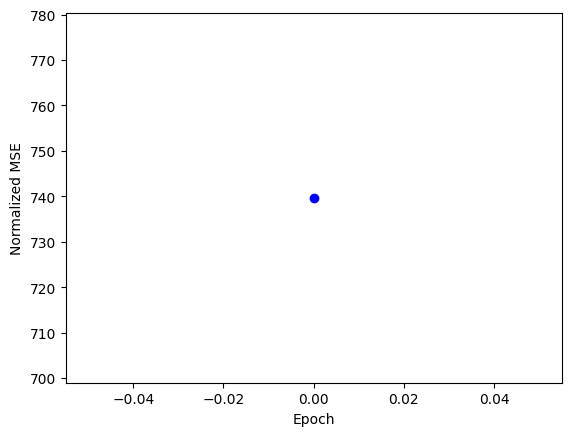

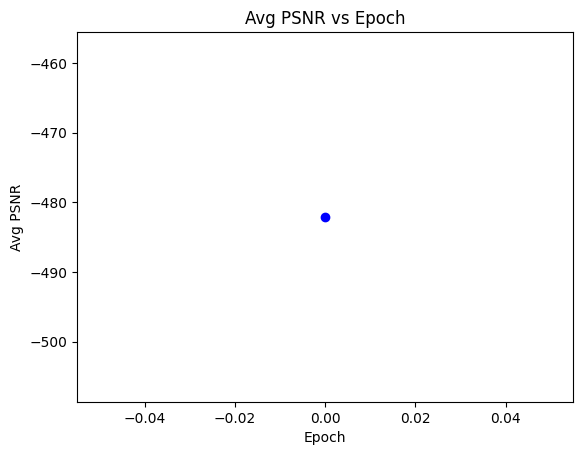

Epoch 2/6:   0%|          | 0/98 [00:00<?, ?it/s]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:   1%|          | 1/98 [00:50<1:22:02, 50.74s/it, PSNR=-25.2, MSE=34.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:   2%|▏         | 2/98 [01:41<1:21:26, 50.90s/it, PSNR=-22.6, MSE=27.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:   3%|▎         | 3/98 [02:32<1:20:17, 50.71s/it, PSNR=-28.1, MSE=55]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:   4%|▍         | 4/98 [03:24<1:20:34, 51.43s/it, PSNR=-20.3, MSE=21.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:   5%|▌         | 5/98 [04:16<1:19:47, 51.48s/it, PSNR=-27.1, MSE=38.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:   6%|▌         | 6/98 [05:06<1:18:25, 51.15s/it, PSNR=-20.9, MSE=26.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:   7%|▋         | 7/98 [05:57<1:17:15, 50.94s/it, PSNR=-22.6, MSE=23.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:   8%|▊         | 8/98 [06:49<1:17:03, 51.37s/it, PSNR=-23.9, MSE=30.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:   9%|▉         | 9/98 [07:42<1:16:51, 51.81s/it, PSNR=-25.2, MSE=38.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  10%|█         | 10/98 [08:33<1:15:40, 51.59s/it, PSNR=-23.2, MSE=28]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  11%|█         | 11/98 [09:25<1:15:09, 51.83s/it, PSNR=-23, MSE=23.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  12%|█▏        | 12/98 [10:17<1:13:58, 51.61s/it, PSNR=-31.7, MSE=69.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  13%|█▎        | 13/98 [11:07<1:12:50, 51.42s/it, PSNR=-29.5, MSE=74.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  14%|█▍        | 14/98 [11:59<1:12:12, 51.58s/it, PSNR=-19.9, MSE=16.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  15%|█▌        | 15/98 [12:52<1:11:33, 51.73s/it, PSNR=-22.1, MSE=23.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  16%|█▋        | 16/98 [13:43<1:10:29, 51.58s/it, PSNR=-27.2, MSE=44.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  17%|█▋        | 17/98 [14:35<1:09:46, 51.68s/it, PSNR=-24.2, MSE=31.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  18%|█▊        | 18/98 [15:25<1:08:34, 51.43s/it, PSNR=-26.7, MSE=47.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  19%|█▉        | 19/98 [16:17<1:07:34, 51.32s/it, PSNR=-24.9, MSE=36]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  20%|██        | 20/98 [17:10<1:07:42, 52.08s/it, PSNR=-20.9, MSE=21.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  21%|██▏       | 21/98 [18:01<1:06:15, 51.63s/it, PSNR=-21.8, MSE=23.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  22%|██▏       | 22/98 [18:52<1:05:11, 51.47s/it, PSNR=-22.2, MSE=24.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  23%|██▎       | 23/98 [19:44<1:04:29, 51.59s/it, PSNR=-21.2, MSE=24.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  24%|██▍       | 24/98 [20:35<1:03:35, 51.56s/it, PSNR=-25.5, MSE=41.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  26%|██▌       | 25/98 [21:28<1:03:09, 51.91s/it, PSNR=-30.5, MSE=62.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  27%|██▋       | 26/98 [22:20<1:02:17, 51.91s/it, PSNR=-25.3, MSE=33.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  28%|██▊       | 27/98 [23:11<1:01:06, 51.64s/it, PSNR=-30.6, MSE=73.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  29%|██▊       | 28/98 [24:03<1:00:15, 51.65s/it, PSNR=-24.5, MSE=36.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  30%|██▉       | 29/98 [24:55<59:28, 51.72s/it, PSNR=-20.4, MSE=19.3]  

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  31%|███       | 30/98 [25:46<58:27, 51.59s/it, PSNR=-25.8, MSE=40.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  32%|███▏      | 31/98 [26:39<58:00, 51.94s/it, PSNR=-20.7, MSE=20.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  33%|███▎      | 32/98 [27:30<56:58, 51.80s/it, PSNR=-24.3, MSE=38.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  34%|███▎      | 33/98 [28:22<56:14, 51.92s/it, PSNR=-31.5, MSE=76.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  35%|███▍      | 34/98 [29:14<55:13, 51.77s/it, PSNR=-30.6, MSE=60.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  36%|███▌      | 35/98 [30:05<54:06, 51.54s/it, PSNR=-23.3, MSE=27.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  37%|███▋      | 36/98 [30:57<53:26, 51.72s/it, PSNR=-23.6, MSE=30.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  38%|███▊      | 37/98 [31:50<52:50, 51.98s/it, PSNR=-27.9, MSE=49.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  39%|███▉      | 38/98 [32:41<51:44, 51.74s/it, PSNR=-21.2, MSE=21.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  40%|███▉      | 39/98 [33:32<50:50, 51.71s/it, PSNR=-24.5, MSE=29.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  41%|████      | 40/98 [34:24<49:59, 51.72s/it, PSNR=-24.9, MSE=37.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  42%|████▏     | 41/98 [35:15<49:02, 51.62s/it, PSNR=-23.6, MSE=27.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  43%|████▎     | 42/98 [36:09<48:43, 52.21s/it, PSNR=-33.1, MSE=81.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  44%|████▍     | 43/98 [37:01<47:40, 52.00s/it, PSNR=-25.3, MSE=37.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  45%|████▍     | 44/98 [37:52<46:39, 51.84s/it, PSNR=-23.2, MSE=33]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  46%|████▌     | 45/98 [38:44<45:55, 51.99s/it, PSNR=-21.6, MSE=21.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  47%|████▋     | 46/98 [39:36<45:04, 52.01s/it, PSNR=-23.5, MSE=30.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  48%|████▊     | 47/98 [40:27<43:53, 51.63s/it, PSNR=-33.8, MSE=101]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  49%|████▉     | 48/98 [41:21<43:29, 52.20s/it, PSNR=-27.4, MSE=47.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  50%|█████     | 49/98 [42:13<42:38, 52.21s/it, PSNR=-25.2, MSE=41]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  51%|█████     | 50/98 [43:04<41:33, 51.95s/it, PSNR=-24.1, MSE=31.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  52%|█████▏    | 51/98 [43:56<40:35, 51.82s/it, PSNR=-26.6, MSE=42.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  53%|█████▎    | 52/98 [44:48<39:50, 51.97s/it, PSNR=-21.7, MSE=23.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  54%|█████▍    | 53/98 [45:41<39:09, 52.20s/it, PSNR=-22.4, MSE=27.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  55%|█████▌    | 54/98 [46:33<38:10, 52.06s/it, PSNR=-27.2, MSE=51.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  56%|█████▌    | 55/98 [47:25<37:18, 52.06s/it, PSNR=-22.4, MSE=29.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  57%|█████▋    | 56/98 [48:16<36:16, 51.83s/it, PSNR=-23.9, MSE=28.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  58%|█████▊    | 57/98 [49:07<35:14, 51.56s/it, PSNR=-27.8, MSE=53.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  59%|█████▉    | 58/98 [49:59<34:27, 51.69s/it, PSNR=-33.2, MSE=93.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  60%|██████    | 59/98 [50:52<33:51, 52.08s/it, PSNR=-24.4, MSE=33.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  61%|██████    | 60/98 [51:43<32:52, 51.90s/it, PSNR=-22.4, MSE=24.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  62%|██████▏   | 61/98 [52:35<32:01, 51.93s/it, PSNR=-30.4, MSE=87.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  63%|██████▎   | 62/98 [53:27<31:04, 51.78s/it, PSNR=-23.2, MSE=30.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  64%|██████▍   | 63/98 [54:18<30:09, 51.71s/it, PSNR=-25.1, MSE=31.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  65%|██████▌   | 64/98 [55:11<29:29, 52.04s/it, PSNR=-22.3, MSE=25.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  66%|██████▋   | 65/98 [56:04<28:43, 52.22s/it, PSNR=-20.5, MSE=17.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  67%|██████▋   | 66/98 [56:55<27:37, 51.79s/it, PSNR=-24.6, MSE=41.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  68%|██████▊   | 67/98 [57:46<26:39, 51.60s/it, PSNR=-25.6, MSE=37.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  69%|██████▉   | 68/98 [58:38<25:53, 51.78s/it, PSNR=-21.4, MSE=21.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  70%|███████   | 69/98 [59:29<24:57, 51.64s/it, PSNR=-21, MSE=22.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  71%|███████▏  | 70/98 [1:00:22<24:17, 52.04s/it, PSNR=-32.1, MSE=78.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  72%|███████▏  | 71/98 [1:01:14<23:23, 51.98s/it, PSNR=-25.1, MSE=32.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  73%|███████▎  | 72/98 [1:02:05<22:23, 51.68s/it, PSNR=-23.5, MSE=27.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  74%|███████▍  | 73/98 [1:02:56<21:28, 51.56s/it, PSNR=-28.1, MSE=49]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  76%|███████▌  | 74/98 [1:03:48<20:38, 51.62s/it, PSNR=-22, MSE=27.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  77%|███████▋  | 75/98 [1:04:39<19:43, 51.47s/it, PSNR=-18.9, MSE=16.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  78%|███████▊  | 76/98 [1:05:32<18:59, 51.78s/it, PSNR=-17.9, MSE=13.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  79%|███████▊  | 77/98 [1:06:24<18:11, 51.99s/it, PSNR=-24.8, MSE=35.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  80%|███████▉  | 78/98 [1:07:15<17:15, 51.78s/it, PSNR=-24.1, MSE=33]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  81%|████████  | 79/98 [1:08:07<16:20, 51.62s/it, PSNR=-28.9, MSE=60.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  82%|████████▏ | 80/98 [1:08:59<15:31, 51.76s/it, PSNR=-24.7, MSE=34.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  83%|████████▎ | 81/98 [1:09:50<14:38, 51.69s/it, PSNR=-19.3, MSE=18]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  84%|████████▎ | 82/98 [1:10:43<13:52, 52.01s/it, PSNR=-31.6, MSE=89.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  85%|████████▍ | 83/98 [1:11:35<13:01, 52.09s/it, PSNR=-27.3, MSE=46.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  86%|████████▌ | 84/98 [1:12:26<12:05, 51.79s/it, PSNR=-21.8, MSE=25.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  87%|████████▋ | 85/98 [1:13:18<11:10, 51.60s/it, PSNR=-25.4, MSE=38.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  88%|████████▊ | 86/98 [1:14:10<10:21, 51.79s/it, PSNR=-22.4, MSE=29.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  89%|████████▉ | 87/98 [1:15:01<09:29, 51.73s/it, PSNR=-23.7, MSE=33.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  90%|████████▉ | 88/98 [1:15:54<08:40, 52.03s/it, PSNR=-28.8, MSE=60.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  91%|█████████ | 89/98 [1:16:46<07:48, 52.05s/it, PSNR=-32.1, MSE=85.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  92%|█████████▏| 90/98 [1:17:37<06:54, 51.79s/it, PSNR=-24.3, MSE=33.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  93%|█████████▎| 91/98 [1:18:29<06:02, 51.73s/it, PSNR=-27.9, MSE=50.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  94%|█████████▍| 92/98 [1:19:21<05:11, 51.87s/it, PSNR=-23.9, MSE=29.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  95%|█████████▍| 93/98 [1:20:14<04:20, 52.19s/it, PSNR=-23.1, MSE=25.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  96%|█████████▌| 94/98 [1:21:05<03:27, 51.91s/it, PSNR=-16.7, MSE=14.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  97%|█████████▋| 95/98 [1:21:57<02:35, 51.80s/it, PSNR=-20.6, MSE=23.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  98%|█████████▊| 96/98 [1:22:50<01:44, 52.25s/it, PSNR=-25.8, MSE=43.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 2/6:  99%|█████████▉| 97/98 [1:23:48<00:51, 51.84s/it, PSNR=-25.7, MSE=35.4]


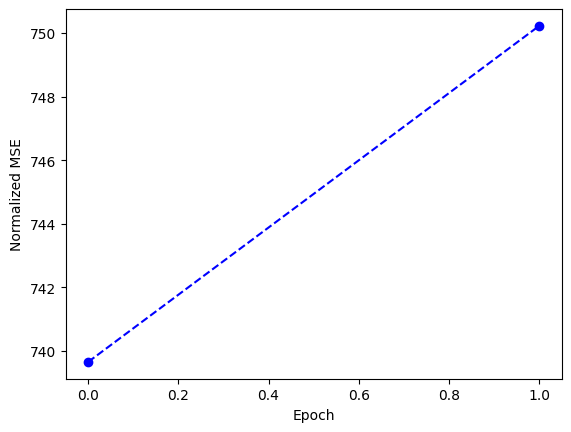

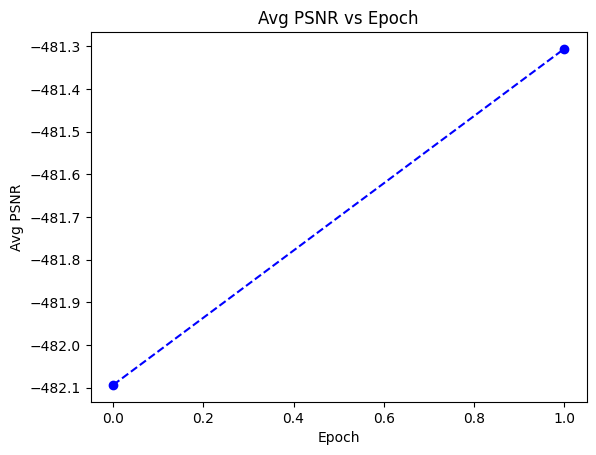

Epoch 3/6:   0%|          | 0/98 [00:00<?, ?it/s]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:   1%|          | 1/98 [00:57<1:32:51, 57.44s/it, PSNR=-23.5, MSE=27.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:   2%|▏         | 2/98 [01:56<1:33:36, 58.50s/it, PSNR=-24.2, MSE=33.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:   3%|▎         | 3/98 [02:53<1:31:38, 57.88s/it, PSNR=-24.2, MSE=31.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:   4%|▍         | 4/98 [03:51<1:30:39, 57.87s/it, PSNR=-26.2, MSE=35.3]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:   5%|▌         | 5/98 [04:48<1:29:00, 57.42s/it, PSNR=-28, MSE=54.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:   6%|▌         | 6/98 [05:45<1:28:06, 57.46s/it, PSNR=-23.5, MSE=32.1]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:   7%|▋         | 7/98 [06:45<1:28:01, 58.03s/it, PSNR=-31.4, MSE=100]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:   8%|▊         | 8/98 [07:42<1:26:39, 57.77s/it, PSNR=-22.6, MSE=22.9]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:   9%|▉         | 9/98 [08:40<1:25:42, 57.78s/it, PSNR=-21.1, MSE=22.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  10%|█         | 10/98 [09:37<1:24:25, 57.56s/it, PSNR=-19.8, MSE=19.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  11%|█         | 11/98 [10:34<1:23:34, 57.64s/it, PSNR=-24.6, MSE=36.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  12%|█▏        | 12/98 [11:33<1:23:05, 57.97s/it, PSNR=-19, MSE=16]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  13%|█▎        | 13/98 [12:30<1:21:40, 57.66s/it, PSNR=-23.6, MSE=35]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  14%|█▍        | 14/98 [13:27<1:20:31, 57.52s/it, PSNR=-23.4, MSE=31.7]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  15%|█▌        | 15/98 [14:24<1:19:08, 57.21s/it, PSNR=-26.1, MSE=35.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  16%|█▋        | 16/98 [15:21<1:18:13, 57.24s/it, PSNR=-30.4, MSE=67.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  17%|█▋        | 17/98 [16:17<1:16:50, 56.92s/it, PSNR=-22.6, MSE=25.5]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  18%|█▊        | 18/98 [17:16<1:16:37, 57.47s/it, PSNR=-22.1, MSE=29]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  19%|█▉        | 19/98 [18:12<1:15:08, 57.08s/it, PSNR=-24.9, MSE=33.8]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  20%|██        | 20/98 [19:06<1:12:56, 56.10s/it, PSNR=-26.9, MSE=52.2]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  21%|██▏       | 21/98 [20:02<1:11:59, 56.10s/it, PSNR=-30.9, MSE=67]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  22%|██▏       | 22/98 [20:59<1:11:28, 56.43s/it, PSNR=-20.3, MSE=21.6]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


Epoch 3/6:  23%|██▎       | 23/98 [21:57<1:11:07, 56.90s/it, PSNR=-23.4, MSE=30.4]

Test Code - Shapes:
R_low shape: torch.Size([5, 1, 128, 128])
Comepleted Block CCN1
Comepleted Block CCN2
Comepleted Block MFN1
Comepleted Block MFN2
Comepleted Block DEN1
Comepleted Block DEN2


In [ ]:
ccn_weight_r=1.0
ccn_weight_c=0.7
ccn_weight_cr=1.0
mfn_weight_r=0.1
mfn_weight_c=5
mfn_weight_p=3
mfn_weight_s=1.0
lr=0.001
save_model  =True
# device = torch.device("cuda")

ccfn_instance = CCFN(ccn_weight_r,ccn_weight_c,ccn_weight_cr,mfn_weight_r,mfn_weight_c,mfn_weight_p,mfn_weight_s,lr,device)

# Train the model using the created instance
ccfn_instance.train_model(epochs=6, lowlight_image= lowlight_data_loader, normal_image= highlight_data_loader)

# Save the trained model if needed
ccfn_instance.save_model()


In [ ]:
# class CCFNTest():
#     def __init__(self, ccfn_model, ccn_weights_path, mfn_weights_path, den_weights_path):
#         self.ccfn_model = ccfn_model
#         self.ccn_weights_path = ccn_weights_path
#         self.mfn_weights_path = mfn_weights_path
#         self.den_weights_path = den_weights_path

#     def load_weights(self):
#         # Load the trained model weights
#         self.ccfn_model.load_model(self.ccn_weights_path, self.mfn_weights_path, self.den_weights_path)

#     def test_image(self, image_path):
#         transform = transforms.Compose([
#             transforms.ToTensor(),
#         ])

#         # Load the image
#         image = Image.open(image_path).convert('RGB')
#         input_tensor = transform(image).unsqueeze(0)

#         # Load the trained model weights if not loaded already
#         if not self.ccfn_model.is_loaded():
#             self.load_weights()

#         # Set the model to evaluation mode
#         self.ccfn_model.eval()

#         with torch.no_grad():
#             # Forward pass
#             enhanced_image = self.ccfn_model.DEN(input_tensor).cpu().numpy()

#             # Display the original and enhanced images using matplotlib
#             plt.figure(figsize=(8, 4))
#             plt.subplot(1, 2, 1)
#             plt.imshow(input_tensor[0].permute(1, 2, 0).numpy())
#             plt.title('Original Image')
#             plt.axis('off')

#             plt.subplot(1, 2, 2)
#             plt.imshow(enhanced_image[0].transpose(1, 2, 0))
#             plt.title('Enhanced Image')
#             plt.axis('off')

#             plt.show()
